## Loading Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [56]:
ts = pd.read_excel('Stocks.xlsx')
ts.index= ts['date']
ts.drop(['date'], axis=1, inplace=True)
ts = ts[::-1]

+ Today we will be looking at several famous single stocks in US stock market:

+ [Apple Inc. (AAPL)](https://finance.yahoo.com/quote/AAPL/) 

+ [The Boeing Company (BA)](https://finance.yahoo.com/quote/BA/) 

+ [Citigroup Inc. (C)](https://finance.yahoo.com/quote/C/)

+ [Starbucks Corporation (SBUX)](https://finance.yahoo.com/quote/SBUX/) 

+ [International Business Machines Corporation (IBM)](https://finance.yahoo.com/quote/IBM/)

In [53]:
ts.head()

,AAPL,BA,C,SBUX,IBM
date,,,,,
2020-12-31,132.069104,214.06,60.233701,105.678016,121.426902
2020-12-30,133.094284,216.67,59.452206,104.680308,119.941381
2020-12-29,134.238903,216.25,59.501049,104.344446,119.420484
2020-12-28,136.050387,216.09,59.715960,103.070146,120.404401
2020-12-24,131.352473,217.15,59.168914,100.768503,120.278999


+ For simplicity, here we only consider adj close as daily price.

+ Since we have loaded time series, let's have a look at the historical performance.
+ In order for fair comparison, we normalize the starting point in the same.

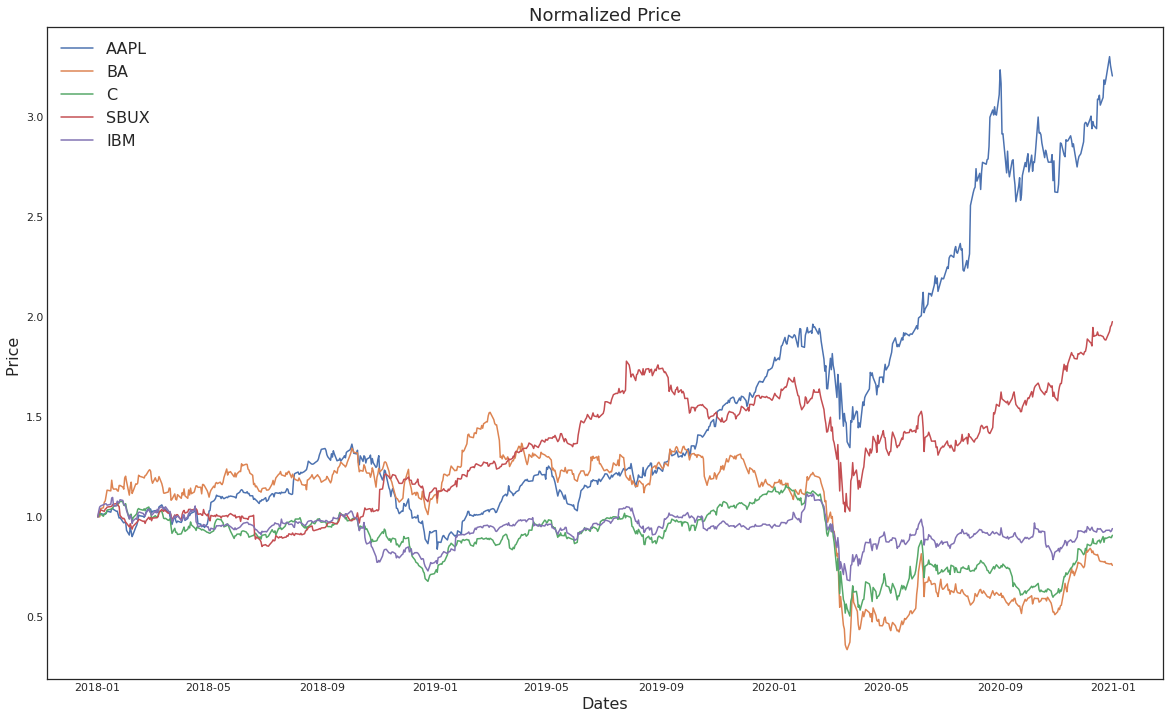

In [57]:
normalized_price = (ts/ts.iloc[0])
fig =plt.figure(figsize=(20,12))
plt.plot(normalized_price)
title_text_obj = plt.title("Normalized Price", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Price ', fontsize = 16)
plt.legend(('AAPL', 'BA', 'C', 'SBUX', 'IBM' ),fontsize = 16,loc = 'best')
plt.show()

## Return

+ Price change is what matters most in our study, we need to calculate the daily price change based on pandas methods.

In [60]:
AAPL_return = ts['AAPL'].pct_change()
AAPL_return.head()

date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: AAPL, dtype: float64

In [61]:
BA_return = ts['BA'].pct_change()
C_return = ts['C'].pct_change()
SBUX_return = ts['SBUX'].pct_change()
IBM_return = ts['IBM'].pct_change()

returns = ts.pct_change()

In [62]:
returns

,AAPL,BA,C,SBUX,IBM
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003234,0.003093,0.018740,0.027488
2018-01-04,0.004645,-0.003794,0.012334,0.003747,0.020254
2018-01-05,0.011385,0.041022,-0.001324,0.011539,0.004886
2018-01-08,-0.003714,0.004242,-0.011670,-0.005033,0.006031
...,...,...,...,...,...
2020-12-24,0.007712,-0.011562,-0.003455,-0.000490,0.006376
2020-12-28,0.035766,-0.004881,0.009246,0.022841,0.001043
2020-12-29,-0.013315,0.000740,-0.003599,0.012363,-0.008172


+ Now we hve $N$ stocks，and the $i-th$ stock has return $R_i$ with expectation $r_i$. We can define

 $${R}=\left( \begin{array}{c}R_1\\ \vdots\\R_N\end{array}\right)$$
 
 Then we have ：
 
 $$E({R})=\left( \begin{array}{c} r_1\\ \vdots\\r_N\end{array}\right)$$

In [63]:
returns.mean()

AAPL    0.001787
BA      0.000259
C       0.000252
SBUX    0.001099
IBM     0.000099
dtype: float64

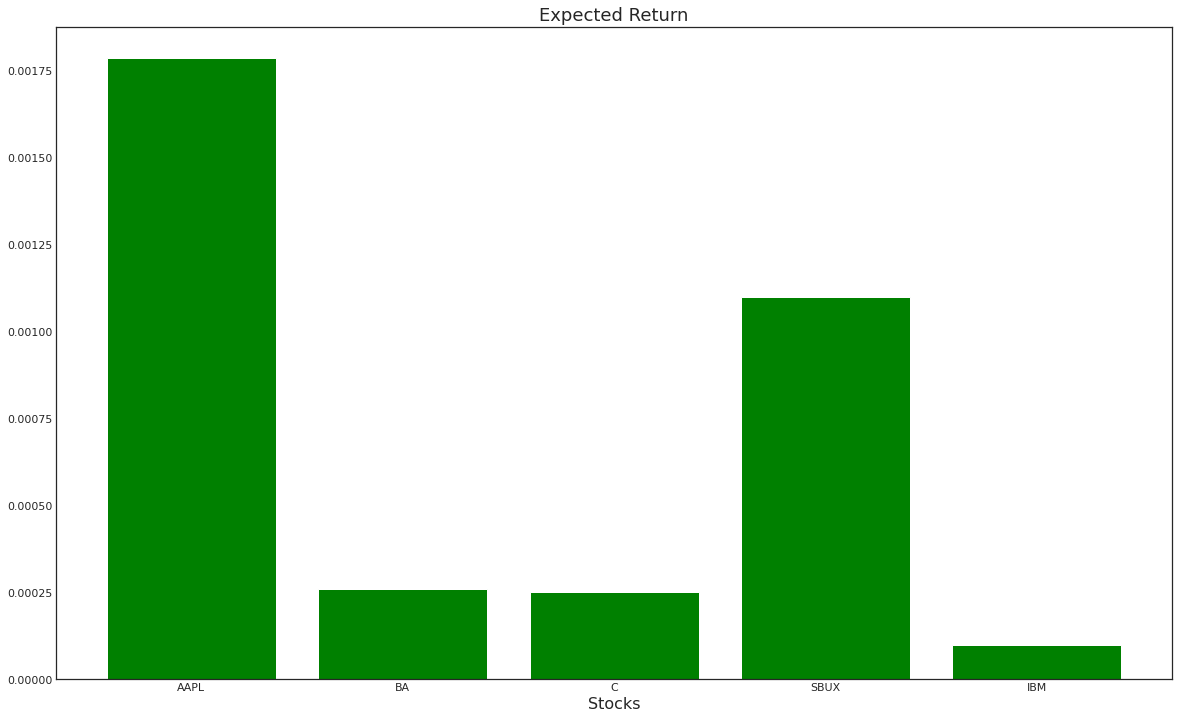

In [64]:
fig =plt.figure(figsize=(20,12))
plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], returns.mean().values, color='green')
title_text_obj = plt.title("Expected Return", fontsize = 18)
xlabel_obj = plt.xlabel('Stocks', fontsize = 16)
plt.show()

## Volatility

+ Here we use standard deviation to measure volatility.

+ For daily volatility, we can use formula below to calculate:
$$ std = \sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2 / (N-1)}$$

+ To convert daily volatility to annualized volatility, we need to multiply the standard deviation by square root of 252 (usually we assume market is open for 252 days per year).

$$ Annualized std = std * \sqrt{252} $$

+ For example, we calculate the annualized volatility for Apple:

In [65]:
ONEYEARDAYS = 252
AAPL_std = AAPL_return.std() * np.sqrt(ONEYEARDAYS)
AAPL_std

0.35101929597964343

+ And we do the same thing for the remaining stocks:

In [66]:
BA_std = BA_return.std() * np.sqrt(ONEYEARDAYS)
C_std = C_return.std() * np.sqrt(ONEYEARDAYS)
SBUX_std = SBUX_return.std() * np.sqrt(ONEYEARDAYS)
IBM_std = IBM_return.std() * np.sqrt(ONEYEARDAYS)

In [67]:
stocks_std = ts.pct_change().std().apply(lambda x: x*np.sqrt(252) )
stocks_std

AAPL    0.351019
BA      0.562205
C       0.436846
SBUX    0.315832
IBM     0.300045
dtype: float64

+ We can visualize how their volatilities look like

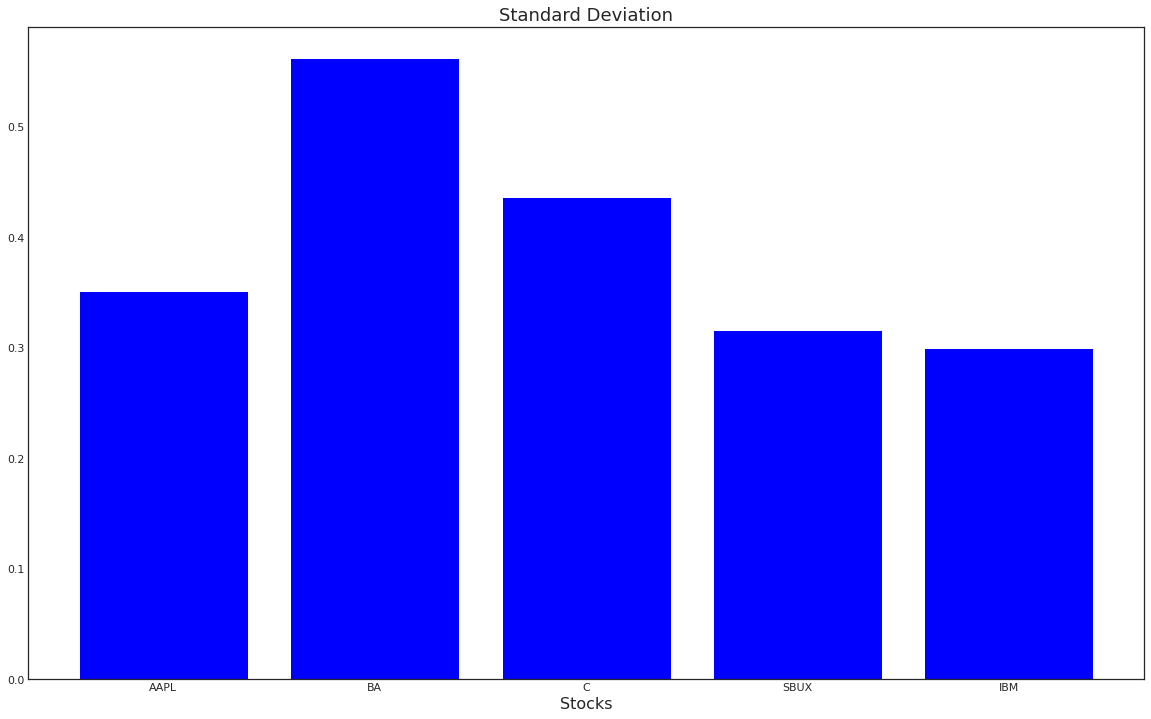

In [68]:
fig =plt.figure(figsize=(20,12))
plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], stocks_std.values, color='blue')
title_text_obj = plt.title("Standard Deviation", fontsize = 18)
xlabel_obj = plt.xlabel('Stocks', fontsize = 16)
plt.show()

+ Other risk measure for return distribution:

  $Skewness = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^3\right]$
  
  $Kurtosis = E\left[\left(\frac{X -\mu}{\sigma(X)}\right)^4\right]$

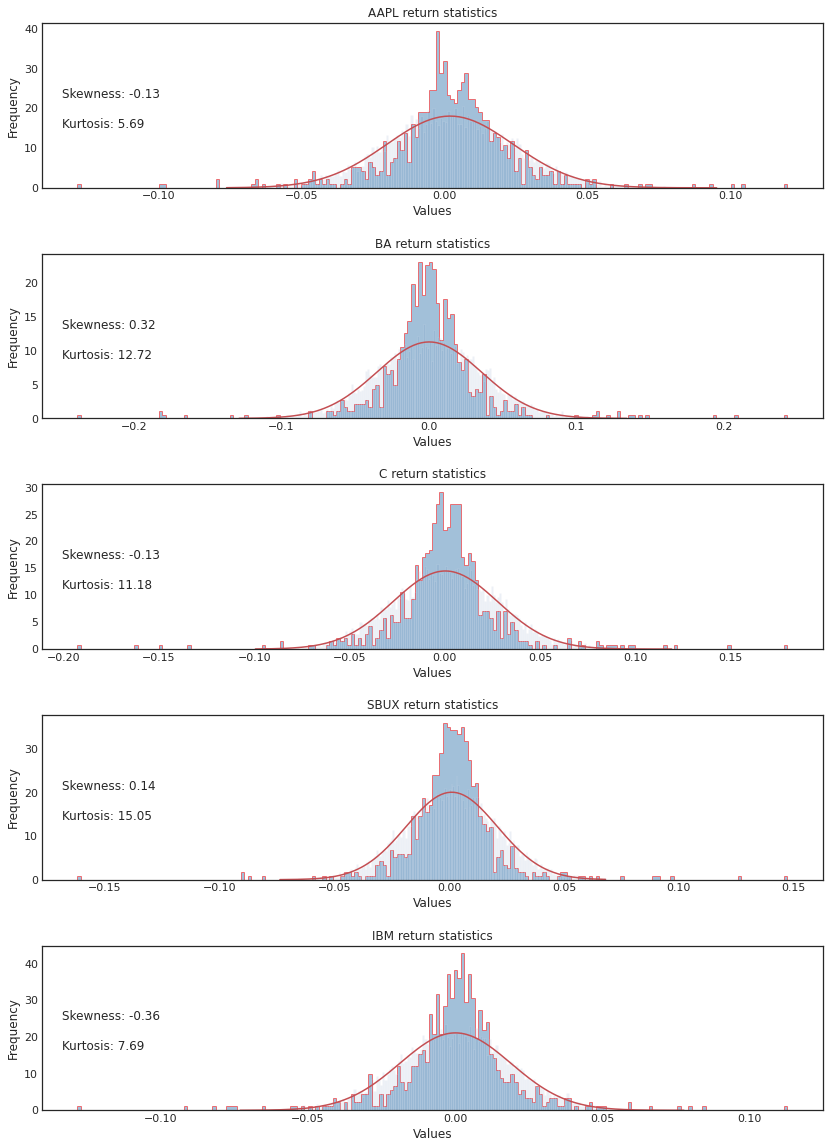

In [69]:
binsnumber = 200
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,20))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

## AAPL
tickname = 'AAPL'
plt.subplot(511)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## BA
tickname = 'BA'
plt.subplot(512)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## C
tickname='C'
plt.subplot(513)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## SBUX
tickname='SBUX'
plt.subplot(514)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

## IBM
tickname='IBM'
plt.subplot(515)
ax = plt.gca()
ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns[tickname].std(),returns[tickname].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns[tickname].skew(),2),
                                                  round(returns[tickname].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('{} return statistics'.format(tickname))

plt.show();

### Sharpe Ratio
$$\frac{R_p - R_f }{\sigma_p}$$

Where
+ $R_p$ is the return of the portfolio
+ $R_f$ is the risk-free rate, here we take it as 0.
+ $\Sigma_p$ is the standard deviation of the portfolio

In [70]:
stats = pd.DataFrame()
stats['Annualized Returns(%)']    = np.round(returns.mean() * ONEYEARDAYS *100,2)
stats['Annualized Volatility(%)'] = np.round(returns.std() * np.sqrt(ONEYEARDAYS)*100,2)
stats['Sharpe Ratio'] = np.round(stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)'],2)
stats.style.bar(color=['red','green'], align='zero')

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
AAPL,45.040000,35.100000,1.280000
BA,6.520000,56.220000,0.120000
C,6.350000,43.680000,0.150000
SBUX,27.700000,31.580000,0.880000
IBM,2.480000,30.000000,0.080000


## Covariance, correlation and covariance matrix

+ If we consider multiple stocks, we also need to consider the covariance between each stock.
$$\Omega=Cov(R)$$



+ Let $\Omega_{ij}$ be the covariance of $R_i$ and $R_j$, $\Omega_{ij}=Cov(R_i,R_j)$, $\sigma_i=\sqrt{\Omega_{ii}}$ is the standard deviation (std) of $R_i$. 

In [71]:
AAPL_return.cov(BA_return)

0.00034430900382553613

In [72]:
AAPL_return.cov(AAPL_return)

0.0004889466117065258

In [73]:
AAPL_return.var()

0.0004889466117065258

In [74]:
AAPL_return.corr(BA_return)

0.4396662367861324

In [75]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,BA,C,SBUX,IBM
AAPL,0.000489,0.000344,0.000317,0.000237,0.000224
BA,0.000344,0.001254,0.000655,0.000393,0.000368
C,0.000317,0.000655,0.000757,0.000366,0.000340
SBUX,0.000237,0.000393,0.000366,0.000396,0.000217
IBM,0.000224,0.000368,0.000340,0.000217,0.000357


## Weights and stocks combination

### Let's start from 2 stocks:


Suppose two stocks have expected ***daily return*** as $r_1$ and $r_2$
    
And we allocate different weights to them as $w_1$ and $w_2$ where $w_1 + w_2 = 1$

Then the combination can have expected return as of : $$E(r_c) = w_1r_1 + w_2r_2$$

In order to calculate the combination's volatility (variance & standard deviation), we need to take their correlation $\rho_{12}$ and volatility $\sigma_1,\sigma_2$ into consideration. ***All as daily***

$$\sigma_{r_c}^2=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2$$



####  Take AAPL and BA as an example:

In [76]:
returns.mean()

AAPL    0.001787
BA      0.000259
C       0.000252
SBUX    0.001099
IBM     0.000099
dtype: float64

In [77]:
ts.pct_change().std()

AAPL    0.022112
BA      0.035416
C       0.027519
SBUX    0.019896
IBM     0.018901
dtype: float64

Now we have $$ r_1=0.001787,r_2=0.000258,\sigma_1=0.022112,\sigma_2=0.035416,\rho_{12}=0.4396833097762502$$

In [78]:
r1=0.001787;
r2=0.000258;
sig1=0.022112;
sig2=0.035416;
rho12=0.4396833097762502

And remember we have constraint as $w_1 + w_2 = 1$

So we can express $w_2 = 1 - w_1$

And correspondingly, 
 $$E(r_c) = wr_1 + (1-w)r_2$$
 
$$\sigma_{r_c}^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2$$


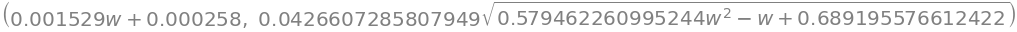

In [79]:
import sympy as sy
from sympy.interactive import printing

printing.init_printing(use_latex=True)
## w for w_1, where w_2 = 1- w_1 = 1- w
w=sy.symbols('w',positive = True, real = True)

## expected return of 2 stocks combination:
r_c =w*r1+(1-w)*r2

variance_c = sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)
std_c =sy.sqrt(variance_c)

sy.simplify(r_c), sy.simplify(std_c)

In [80]:
def get_two_stocks_std(w):
    return np.sqrt(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

def get_two_stocks_return(w):
    return w*r1+(1-w)*r2

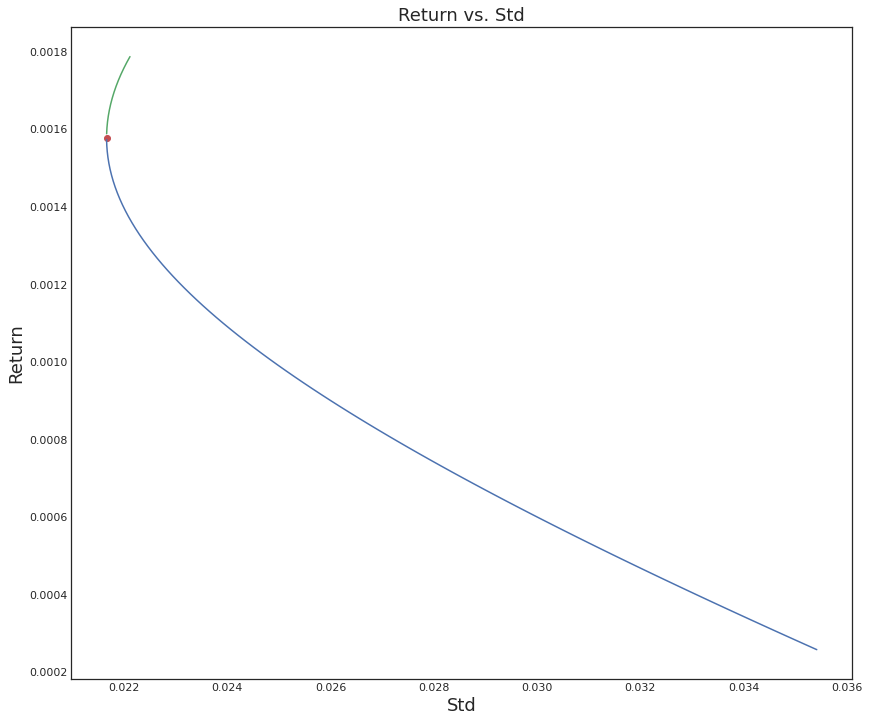

In [81]:
fig=plt.figure(figsize=(14,12)) 
ws = np.linspace(0,1,101)
std_series = get_two_stocks_std(ws)
return_series = get_two_stocks_return(ws)



## solve to get this
w_min = (sig2**2- sig1*sig2*rho12)/(sig1**2 + sig2**2 - 2*sig1*sig2*rho12) 

plt.plot(get_two_stocks_std(w_min) , get_two_stocks_return(w_min), "ro")

plt.plot(get_two_stocks_std(ws[ws < w_min]) , get_two_stocks_return(ws[ws < w_min]),  "b-")
plt.plot(get_two_stocks_std(ws[ws > w_min]) , get_two_stocks_return(ws[ws > w_min]),  "g-")

plt.title("Return vs. Std", fontsize = 18);
plt.ylabel("Return", fontsize = 18);
plt.xlabel("Std", fontsize = 18);

#### Here we can see the relationship between return and standard deviation when we combine 2 stocks together. Such combination is also called ***Portfolio***.

***Portfolio*** can variant based on the weights we allocate to different stocks. And we can find that there exists one point when the std of the portfolio is at its minimum.

And the green part of the line is called **"Efficient Frontier"**

## Portfolio of multiple stocks

+ Let $w_i$ be the weight on $R_i$ in portfolio:
  $$w=\left( \begin{array}{c}w_1\\ \vdots\\ w_N\end{array}\right)$$

+ Weights have constraint $w_1+\cdots+w_N={\bf 1} ^T {w}=1$

+ Portfolio with weights $w$ has expected return：
    $$\sum_{i=1}^{N}w_i r_i=w^T{E(R)}$$
    

+ Portfolio with weights $w$ has variance：
$$Variance _{p} = \sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\Omega_{i,j}=w^T\varOmega w$$

+ Based on such conclusions, how can we find a way to find the minimum variance of the portfolio?

There exists theoretical methods. But here we apply a more practical way called ***Monte Carlo Simulation***.

In [82]:
portfolio_returns = []
portfolio_vols = []


[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]

for p in range(50000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].mean()* weights))
    portfolio_vols.append(np.sqrt(np.dot(weights.T,np.dot(returns[[ 'AAPL', 'BA', 'C', 'SBUX', 'IBM' ]].cov(),
                                                             weights))))
portfolio_returns = np.array(portfolio_returns)


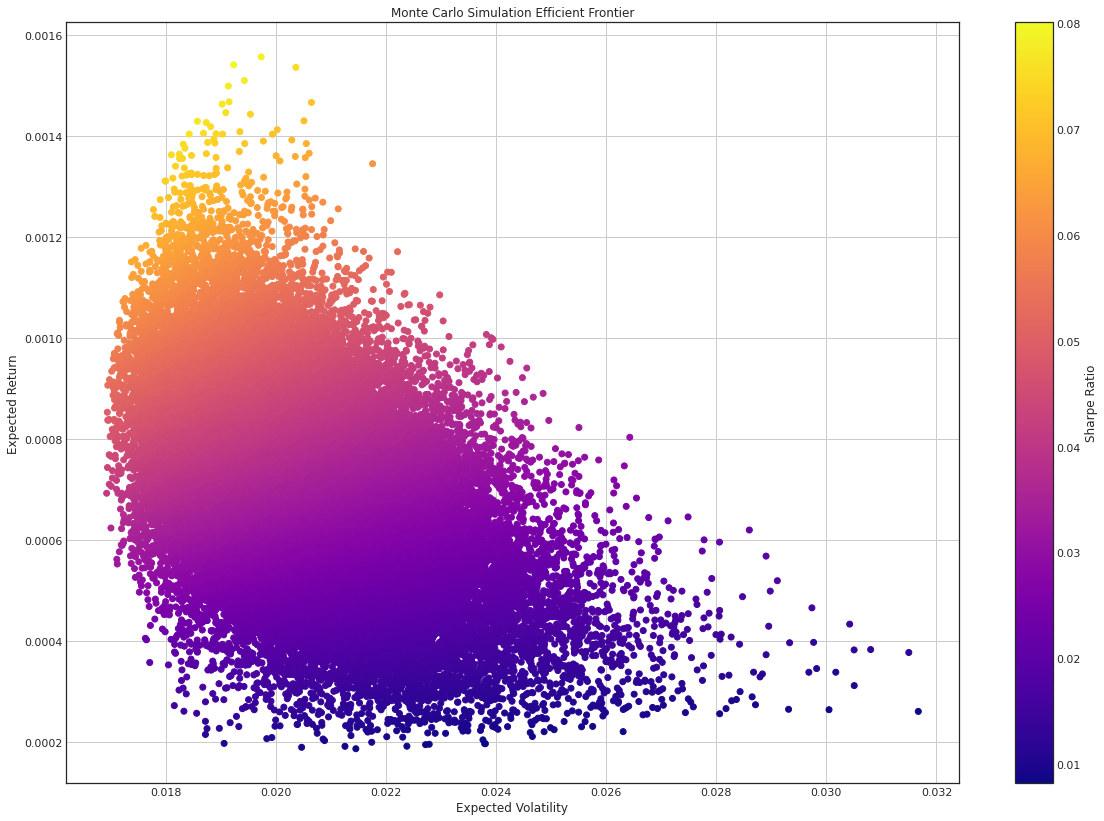

In [83]:
fig = plt.figure(figsize = (20,14))

plt.scatter(portfolio_vols, portfolio_returns, c = portfolio_returns / portfolio_vols, marker = 'o',cmap='plasma')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')

plt.show();
